In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [111]:
import yfinance as yf
import datetime as dt

In [112]:
stock = ['INFY.NS']
start = dt.datetime(2020,1,1)
end = dt.datetime(2025,1,1)

In [113]:
all_data = []

In [114]:
def get_stock(stock,start,end):
    
    for stock_id in stock:
        
        df = yf.download(stock_id, start=start, end=end)
        df = df[['Open', 'High', 'Low', 'Close', 'Volume']]  
        df['Date'] = df.index
        df['stock_id'] = stock_id
        df.reset_index(drop=True, inplace=True)
        all_data.append(df)
        
    if all_data:
            return pd.concat(all_data, ignore_index=True)
    return pd.DataFrame()

In [115]:
df = get_stock(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [116]:
df.reset_index()
df.columns = df.columns.droplevel(1)
df['Date'] = pd.to_datetime(df['Date'])

In [117]:
df.head()


Price,Open,High,Low,Close,Volume,Date,stock_id
0,654.059560,658.508945,651.879351,655.705811,2112415,2020-01-01,INFY.NS
1,657.530158,659.220892,650.411142,653.792664,5658200,2020-01-02,INFY.NS
2,653.080836,665.628082,653.080836,663.848328,7882938,2020-01-03,INFY.NS
3,663.937204,670.789268,655.394406,657.485596,6519403,2020-01-06,INFY.NS
4,656.729191,660.822603,645.249756,647.741455,7899363,2020-01-07,INFY.NS


In [118]:
df['target'] = df['Close'].shift(-1)


In [119]:
from finta import TA

In [120]:
df['ema_10'] = TA.EMA(df, 10)
df['ema_20'] = TA.EMA(df, 20)
df['rsi'] = TA.RSI(df)
df['macd'] = TA.MACD(df)['MACD']
df['bb_upper'] = TA.BBANDS(df)['BB_UPPER']
df['bb_lower'] = TA.BBANDS(df)['BB_LOWER']
df['Return'] = df['Close'].pct_change()
df['macd_signal'] = TA.MACD(df)['SIGNAL']

In [121]:
df.isna().sum()

Price
Open            0
High            0
Low             0
Close           0
Volume          0
Date            0
stock_id        0
target          1
ema_10          0
ema_20          0
rsi             1
macd            0
bb_upper       19
bb_lower       19
Return          1
macd_signal     0
dtype: int64

In [122]:
df.dropna(inplace= True)

In [123]:
df.isna().sum()

Price
Open           0
High           0
Low            0
Close          0
Volume         0
Date           0
stock_id       0
target         0
ema_10         0
ema_20         0
rsi            0
macd           0
bb_upper       0
bb_lower       0
Return         0
macd_signal    0
dtype: int64

In [124]:
df.head()

Price,Open,High,Low,Close,Volume,Date,stock_id,target,ema_10,ema_20,rsi,macd,bb_upper,bb_lower,Return,macd_signal
19,694.993972,695.705863,686.985079,692.324341,5121009,2020-01-28,INFY.NS,702.735901,687.280383,681.899348,65.439790,5.594848,711.490452,636.152664,-0.000128,4.572307
20,699.977249,705.494498,697.886060,702.735901,6832757,2020-01-29,INFY.NS,694.726990,690.132650,684.160146,70.718164,6.196757,714.936200,637.409925,0.015039,4.900222
21,702.735883,702.735883,692.324311,694.726990,3859680,2020-01-30,INFY.NS,690.500061,690.978214,685.291657,62.775660,6.051716,716.324465,640.115092,-0.011397,5.132232
22,694.593473,698.508954,686.629064,690.500061,6092028,2020-01-31,INFY.NS,682.891602,690.890408,685.842851,59.008801,5.580317,717.404140,641.700591,-0.006084,5.222382
23,695.883783,703.848193,680.310937,682.891602,6416745,2020-02-03,INFY.NS,701.089600,689.424206,685.533800,52.860237,4.625268,717.234144,644.411187,-0.011019,5.102392


In [125]:
df.describe(include='number')

Price,Open,High,Low,Close,Volume,target,ema_10,ema_20,rsi,macd,bb_upper,bb_lower,Return,macd_signal
count,1218.000000,1218.000000,1218.000000,1218.000000,1.218000e+03,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,1351.175739,1364.329487,1337.837938,1351.109175,7.504106e+06,1352.062862,1346.627038,1341.623372,54.166810,6.957822,1415.198761,1267.830314,0.000975,6.912822
std,330.628552,332.168283,328.294996,330.479995,5.167343e+06,330.253296,329.402803,328.315427,12.944103,25.039975,341.764781,320.991535,0.017591,23.621435
min,453.169829,496.551330,453.169829,468.475769,3.719660e+05,468.475769,530.665700,563.096639,14.589414,-66.885653,603.253067,428.062879,-0.100393,-59.230170
25%,1220.283774,1231.247826,1207.383289,1219.508667,4.695144e+06,1221.047241,1219.008767,1223.822559,45.799183,-7.111683,1275.352070,1152.269692,-0.008374,-6.229724
50%,1408.469619,1420.250792,1395.628786,1409.530701,6.268190e+06,1409.846802,1405.295405,1407.784721,55.057951,9.534132,1468.562559,1331.876702,0.000965,9.936941
75%,1569.978357,1586.983445,1553.415232,1571.023193,8.711097e+06,1572.139893,1568.604619,1562.799632,63.187031,23.924200,1639.762571,1468.995006,0.009917,23.220505
max,1967.763256,1978.610690,1950.160948,1971.954346,9.043211e+07,1971.954346,1932.932295,1905.744762,87.925735,82.114551,1992.808738,1838.156506,0.120334,75.246917


In [126]:
import plotly.graph_objects as go
import plotly.io as pio

In [127]:
pio.renderers.default = 'browser'

fig = go.Figure(data=[
    go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        increasing_line_color='green',
        decreasing_line_color='red'
    )
])

fig.update_layout(
    title='INFY.NS Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

fig.show()

* Closing Price over date :

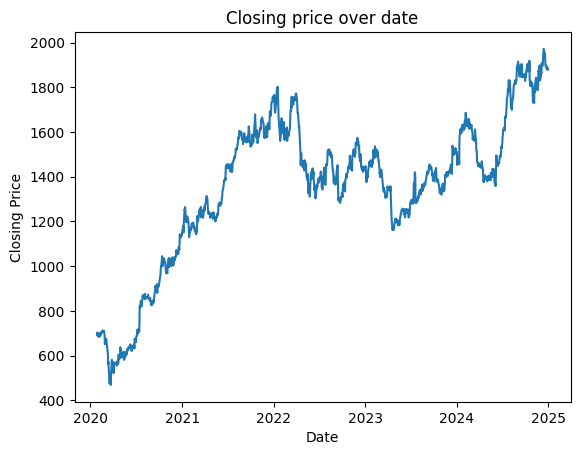

In [128]:
sns.lineplot(df,x=df['Date'],y=df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing price over date')
plt.show()

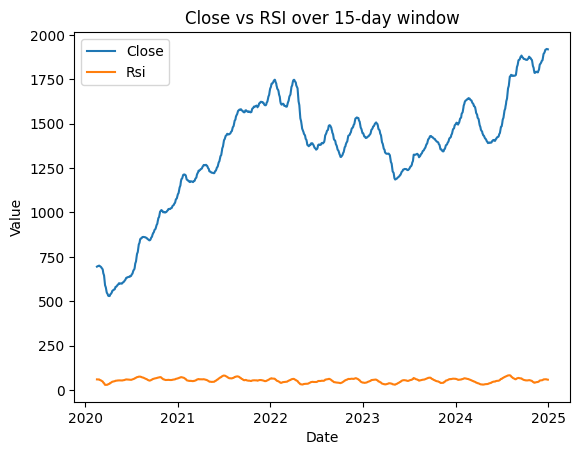

In [129]:
window_size = 15
sns.lineplot(data= df ,x=df['Date'],y=df['Close'].rolling(window_size).mean(),label='Close')
sns.lineplot(data= df ,x=df['Date'],y=df['rsi'].rolling(window_size).mean(),label='Rsi')
plt.title(f'Close vs RSI over {window_size}-day window')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Chart for observing RSI 
if RSI is above 70 it show overbought &
less than 30 shows oversold

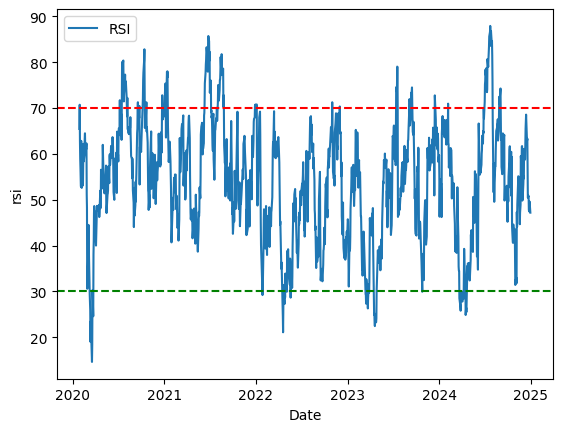

In [130]:
sns.lineplot(data=df, x='Date', y='rsi', label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.show()

* Chart shows Exponential Moving Average with date

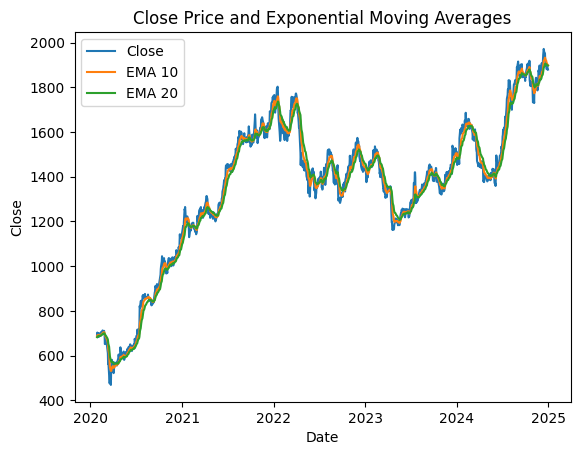

In [131]:
sns.lineplot(data=df, x='Date', y='Close', label='Close')
sns.lineplot(data=df, x='Date', y='ema_10', label='EMA 10')
sns.lineplot(data=df, x='Date', y='ema_20', label='EMA 20')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title("Close Price and Exponential Moving Averages")
plt.show()

Same Chart of EMA & close price in plottly for making more intractive

In [132]:
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['ema_10'], mode='lines', name='EMA 10'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['ema_20'], mode='lines', name='EMA 20'))

fig.update_layout(
    title='Price with EMAs',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,
    hovermode='x unified'
)

fig.show()


## chart for MACD 

It acts as a trigger for buy/sell decisions:

* MACD crosses above the signal line → Buy signal

* MACD crosses below the signal line → Sell signal



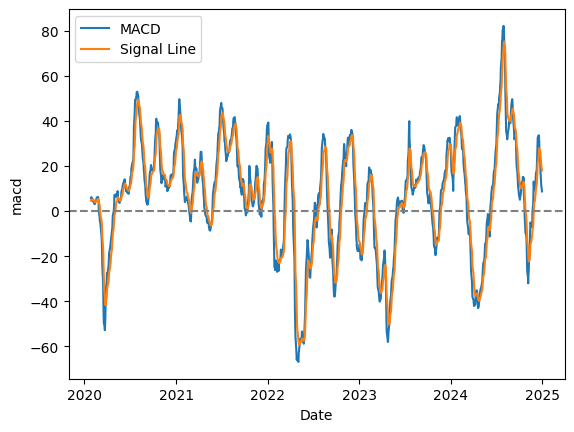

In [133]:
sns.lineplot(data=df, x='Date', y='macd', label='MACD')
sns.lineplot(data=df, x='Date', y='macd_signal', label='Signal Line')
plt.axhline(0, color='gray', linestyle='--')  # zero line
plt.show()

Same Chart of MACD in plottly for making more intractive

In [134]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['macd'], mode='lines', name='MACD'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['macd_signal'], mode='lines', name='Signal'))

fig.update_layout(title='MACD vs Signal Line', xaxis_title='Date', yaxis_title='MACD')
fig.show()


## Bollinger Band

Bollinger Bands are a technical analysis tool that visualize volatility and price levels relative to a moving average. They're commonly used to identify:

* Overbought and oversold conditions

* Potential trend reversals

* Periods of low/high volatility

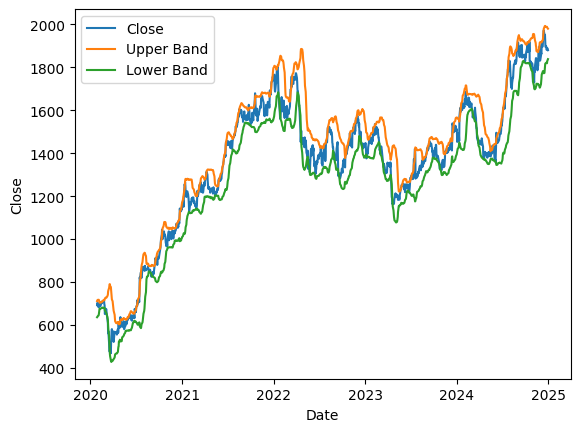

In [135]:
sns.lineplot(data=df, x='Date', y='Close', label='Close')
sns.lineplot(data=df, x='Date', y='bb_upper', label='Upper Band')
sns.lineplot(data=df, x='Date', y='bb_lower', label='Lower Band')
plt.show()

In [136]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['bb_upper'], name='Upper Band'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['bb_lower'], name='Lower Band'))

fig.update_layout(title='Bollinger Bands', xaxis_title='Date', yaxis_title='Price')
fig.show()


# Correlation Heatmap :

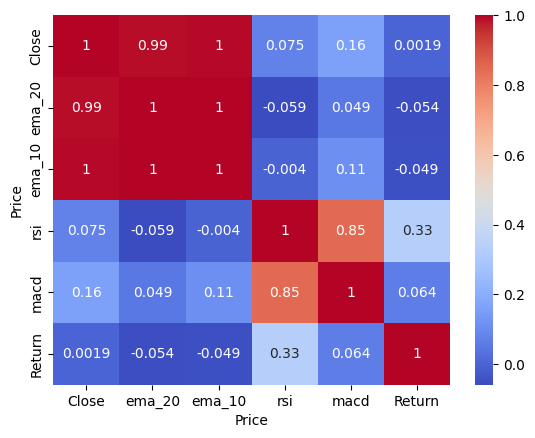

In [137]:
import seaborn as sns
corr = df[['Close', 'ema_20', 'ema_10', 'rsi', 'macd', 'Return']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


From the heatmap, it was observed that the Exponential Moving Averages with windows of 10 (EMA10) and 20 (EMA20) show a very high correlation and exhibit similar movement patterns over time. Including both may introduce feature redundancy, which can lead to:
* Overfitting in deep learning models
To avoid this, ema_10 has been dropped from the final dataset.

In [138]:
df.drop(columns=['ema_10'],inplace=True)

In [139]:
df['target'] = df['Close'].shift(-1)
df['Volume_log'] = np.log1p(df['Volume'])
df['Return_clipped'] = df['Return'].clip(-0.05, 0.05)

In [140]:
df.head()

Price,Open,High,Low,Close,Volume,Date,stock_id,target,ema_20,rsi,macd,bb_upper,bb_lower,Return,macd_signal,Volume_log,Return_clipped
19,694.993972,695.705863,686.985079,692.324341,5121009,2020-01-28,INFY.NS,702.735901,681.899348,65.439790,5.594848,711.490452,636.152664,-0.000128,4.572307,15.448862,-0.000128
20,699.977249,705.494498,697.886060,702.735901,6832757,2020-01-29,INFY.NS,694.726990,684.160146,70.718164,6.196757,714.936200,637.409925,0.015039,4.900222,15.737239,0.015039
21,702.735883,702.735883,692.324311,694.726990,3859680,2020-01-30,INFY.NS,690.500061,685.291657,62.775660,6.051716,716.324465,640.115092,-0.011397,5.132232,15.166095,-0.011397
22,694.593473,698.508954,686.629064,690.500061,6092028,2020-01-31,INFY.NS,682.891602,685.842851,59.008801,5.580317,717.404140,641.700591,-0.006084,5.222382,15.622492,-0.006084
23,695.883783,703.848193,680.310937,682.891602,6416745,2020-02-03,INFY.NS,701.089600,685.533800,52.860237,4.625268,717.234144,644.411187,-0.011019,5.102392,15.674422,-0.011019


This code prepares the dataset for multi-day stock price prediction by shifting the Close price to create future target columns.

In [141]:
df.sort_values(by='Date',inplace= True)

In [142]:
df.to_csv('cleaned_stock_data.csv', index=False)